In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
train=pd.read_excel('/content/drive/MyDrive/End to end machine learning Projects/Flight price prediction/Data_Train.xlsx')
test=pd.read_excel('/content/drive/MyDrive/End to end machine learning Projects/Flight price prediction/Test_set.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train.shape

(10683, 11)

In [ ]:
test.shape

(2671, 10)

In [ ]:
total=train.append(test)
total.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
## feature engineering

#1. Deal with date of Journey
total.Date_of_Journey.head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [ ]:
# Try to split it into day month and year
total['Date']=total['Date_of_Journey'].str.split('/').str[0]
total.head()
total['Month']=total['Date_of_Journey'].str.split('/').str[1]
total['Year']=total['Date_of_Journey'].str.split('/').str[2]

# Another method
#total['Date1']=pd.to_datetime(total['Date_of_Journey'],format='%d/%m/%Y').dt.day
#total['Month1']=pd.to_datetime(total['Date_of_Journey'],format='%d/%m/%Y').dt.month
total.head()

data=total.drop(['Date_of_Journey','Price'],axis=1)

data.head()
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Source           13354 non-null  object
 2   Destination      13354 non-null  object
 3   Route            13353 non-null  object
 4   Dep_Time         13354 non-null  object
 5   Arrival_Time     13354 non-null  object
 6   Duration         13354 non-null  object
 7   Total_Stops      13353 non-null  object
 8   Additional_Info  13354 non-null  object
 9   Date             13354 non-null  int64 
 10  Month            13354 non-null  int64 
 11  Year             13354 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [ ]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [ ]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# now deal with destination

pd.get_dummies(data['Destination'],drop_first=True)






,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [ ]:
# Dealing with arrival time
data['Arrival_Time'].head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [ ]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]
data.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3,2019


In [ ]:
# Total stops
data[data['Total_Stops'].isnull()]
data['Total_Stops']=data['Total_Stops'].fillna('2 stop')
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3,2019


In [ ]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

data['Stops']=data['Total_Stops'].str.split(' ').str[0]
data.head()
data['Stops']=data['Stops'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Source           13354 non-null  object
 2   Destination      13354 non-null  object
 3   Route            13353 non-null  object
 4   Dep_Time         13354 non-null  object
 5   Arrival_Time     13354 non-null  object
 6   Duration         13354 non-null  object
 7   Total_Stops      13354 non-null  object
 8   Additional_Info  13354 non-null  object
 9   Date             13354 non-null  int64 
 10  Month            13354 non-null  int64 
 11  Year             13354 non-null  int64 
 12  Stops            13354 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [ ]:
# for arrival time

data['Arrival_Hour']=data['Arrival_Time'].str.split(':').str[0]

data['Arrival_Minute']=data['Arrival_Time'].str.split(':').str[1]

data['Arrival_Hour']=data['Arrival_Hour'].astype(int)

data['Arrival_Minute']=data['Arrival_Minute'].astype(int)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3,2019,1,21,35


In [ ]:
data['Dep_Hour']=data['Dep_Time'].str.split(':').str[0]

data['Dep_Minute']=data['Dep_Time'].str.split(':').str[1]

data['Dep_Hour']=data['Dep_Hour'].astype(int)

data['Dep_Minute']=data['Dep_Minute'].astype(int)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3,2019,1,21,35,16,50


In [ ]:
data=data.drop(['Total_Stops','Arrival_Time','Dep_Time'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Source           13354 non-null  object
 2   Destination      13354 non-null  object
 3   Route            13353 non-null  object
 4   Duration         13354 non-null  object
 5   Additional_Info  13354 non-null  object
 6   Date             13354 non-null  int64 
 7   Month            13354 non-null  int64 
 8   Year             13354 non-null  int64 
 9   Stops            13354 non-null  int64 
 10  Arrival_Hour     13354 non-null  int64 
 11  Arrival_Minute   13354 non-null  int64 
 12  Dep_Hour         13354 non-null  int64 
 13  Dep_Minute       13354 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.5+ MB


In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,1,3,2019,1,21,35,16,50


In [ ]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
top4=[x for x in  data['Additional_Info'].value_counts().head(4).index]
top4

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Long layover']

In [ ]:
#for label in top4:
    #data[label]=np.where(data['Additional_Info']=label,1,0)

# should make function for this top 4

def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        data[variable+'_'+label]=np.where(data[variable]==label,1,0)


one_hot_top_x(data,'Additional_Info',top4)   

data.head()



,Airline,Source,Destination,Route,Duration,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,24,3,2019,0,1,10,22,20,1,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,1,5,2019,2,13,15,5,50,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,9,6,2019,2,4,25,9,25,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,12,5,2019,1,23,30,18,5,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,1,3,2019,1,21,35,16,50,1,0,0,0


In [ ]:
data=data.drop(['Additional_Info'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Airline                                       13354 non-null  object
 1   Source                                        13354 non-null  object
 2   Destination                                   13354 non-null  object
 3   Route                                         13353 non-null  object
 4   Duration                                      13354 non-null  object
 5   Date                                          13354 non-null  int64 
 6   Month                                         13354 non-null  int64 
 7   Year                                          13354 non-null  int64 
 8   Stops                                         13354 non-null  int64 
 9   Arrival_Hour                                  13354 non-null  int64 
 10 

In [ ]:
# Dealing with Duration
data.head()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0


In [ ]:
# dealing with route
big_df=data
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]
big_df.head()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0,BLR,NAG,DEL,NaN,NaN


In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(big_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

big_df['duration_hour']=duration_hours
big_df['duration_mins']=duration_mins
big_df.head()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0,BLR,DEL,NaN,NaN,NaN,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0,CCU,IXR,BBI,BLR,NaN,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0,DEL,LKO,BOM,COK,NaN,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0,CCU,NAG,BLR,NaN,NaN,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0,BLR,NAG,DEL,NaN,NaN,4,45


In [ ]:
big_df['Route_1']=big_df['Route_1'].fillna('None')
big_df['Route_2']=big_df['Route_2'].fillna('None')
big_df['Route_3']=big_df['Route_3'].fillna('None')
big_df['Route_4']=big_df['Route_4'].fillna('None')
big_df['Route_5']=big_df['Route_5'].fillna('None')
big_df.head()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0,DEL,LKO,BOM,COK,None,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0,BLR,NAG,DEL,None,None,4,45


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])

big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [ ]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins
0,IndiGo,0,5,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0,0,13,24,12,4,2,50
1,Air India,3,0,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0,2,25,1,3,4,7,25
2,Jet Airways,2,1,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0,3,32,4,5,4,19,0
3,IndiGo,3,0,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0,2,34,3,12,4,5,25
4,IndiGo,0,5,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0,0,34,8,12,4,4,45


In [ ]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Airline                                       13354 non-null  object
 1   Source                                        13354 non-null  int64 
 2   Destination                                   13354 non-null  int64 
 3   Route                                         13353 non-null  object
 4   Duration                                      13354 non-null  object
 5   Date                                          13354 non-null  int64 
 6   Month                                         13354 non-null  int64 
 7   Year                                          13354 non-null  int64 
 8   Stops                                         13354 non-null  int64 
 9   Arrival_Hour                                  13354 non-null  int64 
 10 

In [ ]:
airline=big_df[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()
big_df=pd.concat([big_df,airline],axis=1)
big_df.head()
#big_df=big_df.drop(['Airline'],axis=1)
#big_df.info()

,Airline,Source,Destination,Route,Duration,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,0,5,BLR → DEL,2h 50m,24,3,2019,0,1,10,22,20,1,0,0,0,0,13,24,12,4,2,50,0,0,1,0,0,0,0,0,0,0,0
1,Air India,3,0,CCU → IXR → BBI → BLR,7h 25m,1,5,2019,2,13,15,5,50,1,0,0,0,2,25,1,3,4,7,25,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,2,1,DEL → LKO → BOM → COK,19h,9,6,2019,2,4,25,9,25,1,0,0,0,3,32,4,5,4,19,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,3,0,CCU → NAG → BLR,5h 25m,12,5,2019,1,23,30,18,5,1,0,0,0,2,34,3,12,4,5,25,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,0,5,BLR → NAG → DEL,4h 45m,1,3,2019,1,21,35,16,50,1,0,0,0,0,34,8,12,4,4,45,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
big_df=big_df.drop(['Duration','Route','Airline'],axis=1)
big_df.head()

,Source,Destination,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,5,24,3,2019,0,1,10,22,20,1,0,0,0,0,13,24,12,4,2,50,0,0,1,0,0,0,0,0,0,0,0
1,3,0,1,5,2019,2,13,15,5,50,1,0,0,0,2,25,1,3,4,7,25,1,0,0,0,0,0,0,0,0,0,0
2,2,1,9,6,2019,2,4,25,9,25,1,0,0,0,3,32,4,5,4,19,0,0,0,0,1,0,0,0,0,0,0,0
3,3,0,12,5,2019,1,23,30,18,5,1,0,0,0,2,34,3,12,4,5,25,0,0,1,0,0,0,0,0,0,0,0
4,0,5,1,3,2019,1,21,35,16,50,1,0,0,0,0,34,8,12,4,4,45,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Source                                        13354 non-null  int64
 1   Destination                                   13354 non-null  int64
 2   Date                                          13354 non-null  int64
 3   Month                                         13354 non-null  int64
 4   Year                                          13354 non-null  int64
 5   Stops                                         13354 non-null  int64
 6   Arrival_Hour                                  13354 non-null  int64
 7   Arrival_Minute                                13354 non-null  int64
 8   Dep_Hour                                      13354 non-null  int64
 9   Dep_Minute                                    13354 non-null  int64
 10  Additional_

In [ ]:
# feature selection with lasso

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
df_train=big_df[0:10683]
df_test=big_df[10683:]
x=df_train
y=train['Price']

from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
x_train.head()

,Source,Destination,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Long layover,Route_1,Route_2,Route_3,Route_4,Route_5,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
508,3,0,21,5,2019,1,18,50,20,20,1,0,0,0,2,14,3,12,4,22,30,0,0,0,0,0,0,0,0,0,1,0
3071,3,0,24,3,2019,1,14,25,6,35,1,0,0,0,2,20,3,12,4,7,50,0,1,0,0,0,0,0,0,0,0,0
2036,0,5,6,3,2019,1,10,25,22,50,1,0,0,0,0,7,8,12,4,11,35,0,0,0,1,0,0,0,0,0,0,0
49,2,1,27,6,2019,2,19,0,23,5,0,1,0,0,3,0,4,5,4,19,55,0,0,0,1,0,0,0,0,0,0,0
9686,3,0,27,5,2019,0,0,50,22,15,1,0,0,0,2,5,24,12,4,2,35,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# selection by lasso
model=SelectFromModel(Lasso(alpha=0.01,random_state=0))
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11100184711.005592, tolerance: 18186255.460618485
  positive)


SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:

selected_features=list(x_train.columns[model.get_support()])
selected_features
x_train_columns=list(x_train.columns)
print(len(x_train_columns))
print(len(selected_features))

32
31


In [ ]:
#_train=x_train.drop(['Year'],axis=1)
#x_test=x_test.drop(['Year'],axis=1)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
train_acc=model.score(x_train,y_train)
test_acc=model.score(x_test,y_test)
print(train_acc)
print(test_acc)

0.7045765677380798
0.6504207932101247


In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
ridge=Ridge()
parameters={'alpha':[1e-10,1e-5,0.05,0.001,1,10,100,50,10000]}
mse=GridSearchCV(ridge,parameters,cv=5)
mse.fit(x_train,y_train)
print(mse.best_params_)
print(mse.best_score_)
train_acc=mse.score(x_train,y_train)
test_acc=mse.score(x_test,y_test)
print(train_acc)
print(test_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.32074e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.33499e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.25405e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.31998e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.30118e-17): result may not be accurate.
  overwrite_a=True).T


{'alpha': 0.05}
0.699862328717606
0.7045715252463569
0.6504461739055665


In [ ]:
y_pred=mse.predict(x_test)
print(y_pred)
print(y_test)

[ 7132.67917229  3157.22920646 10030.89685897 ...  5750.43994193
  9917.72034581 10546.74047982]
9693      6171
9825      3873
7702     10991
1437     16757
6828      6316
         ...  
6392     15898
9273      4804
10011    11982
10037     9663
9973      9181
Name: Price, Length: 2137, dtype: int64


In [ ]:
# k nearest neighbour for regression

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor( n_neighbors=5)
model=knn.fit(x_train,y_train)
train_acc=model.score(x_train,y_train)
test_acc=model.score(x_test,y_test)
print(train_acc)
print(test_acc)

0.7771330314387789
0.6303960890070498


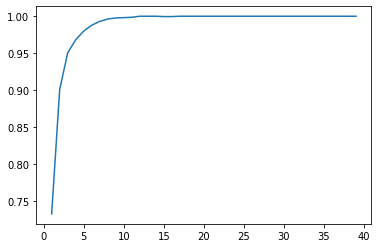

In [ ]:
 # optimization of the KNN
 error_rate=[]
 
 for i in range(1,40):
     knn=KNeighborsRegressor(n_neighbors=i)
     model=knn.fit(x_train,y_train)
     y_pred=model.predict(x_test)
     error_rate.append(np.mean(y_test!=y_pred))

plt.plot(range(1,40),error_rate)     



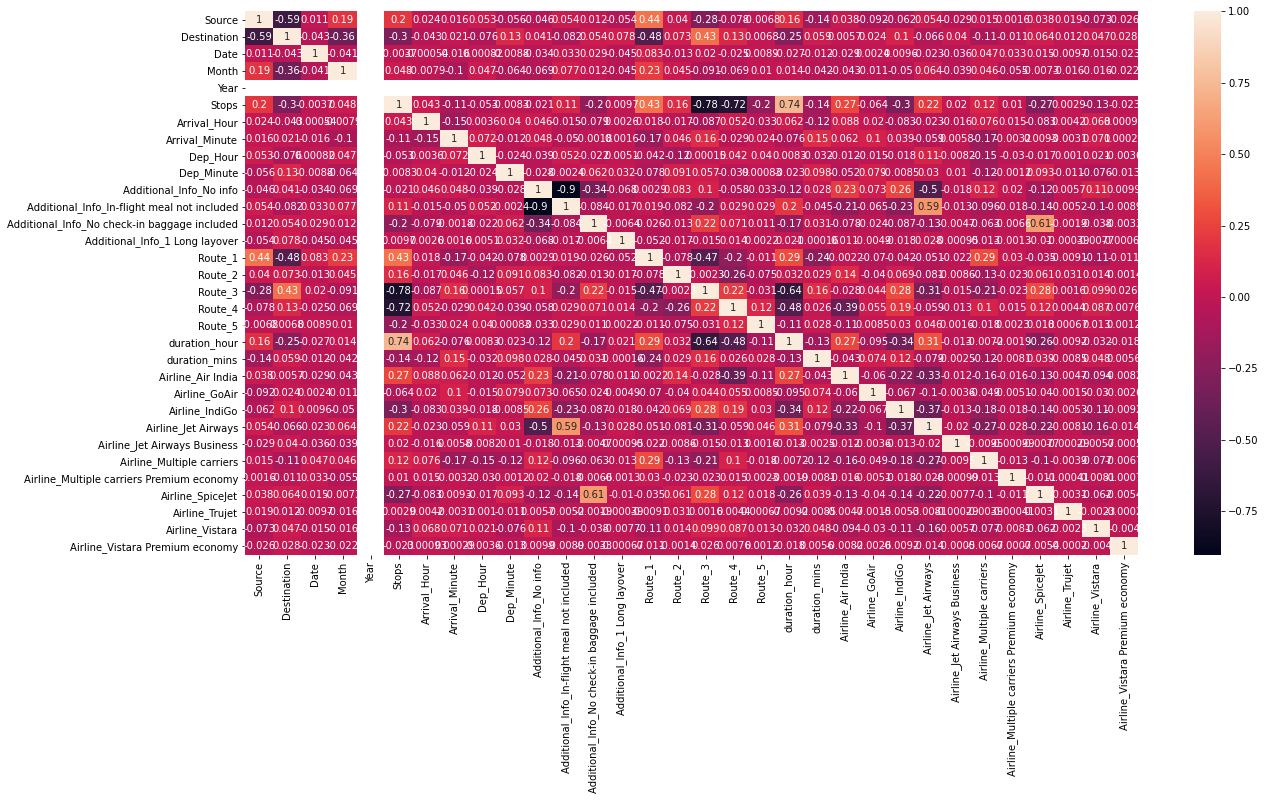

In [ ]:
# Feature Selection by pearson coffecient methods
corr=x_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Random Forest by Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor( )
model=Rfr.fit(x_train,y_train)
trainacc=model.score(x_train,y_train)
testacc=model.score(x_test,y_test)
print(trainacc)
print(testacc)



0.9835547243424237
0.8961268300286176


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


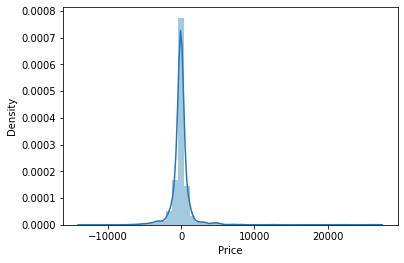

In [ ]:
ypred=model.predict(x_test)
sns.distplot(y_test-ypred)

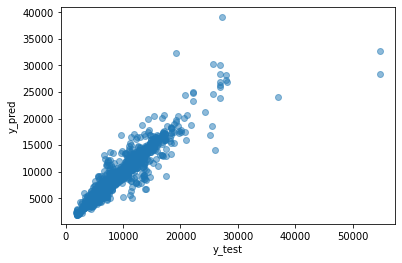

In [ ]:
plt.scatter(y_test, ypred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


HyperParameter Tuning


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = Rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


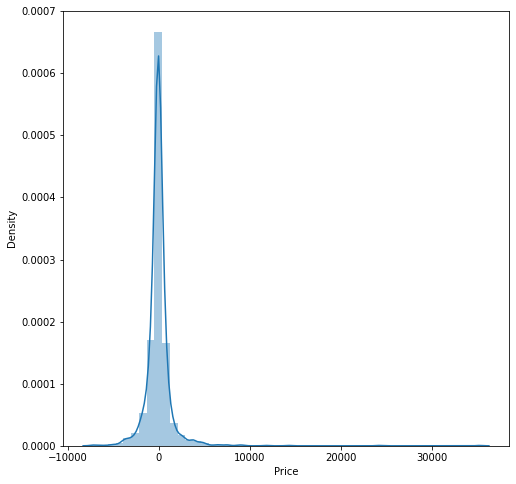

In [ ]:
prediction = rf_random.predict(x_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


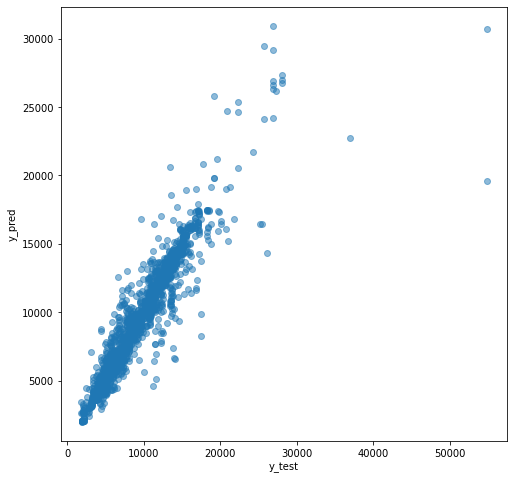

In [ ]:

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Saving the Model

In [ ]:
import pickle
pickle.dump(rf_random,open('flight_fare_prediction.pkl','wb'))
pickle.load(open('flight_fare_prediction.pkl','rb'))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              